# The Impact of the First Dragon on Match Outcomes in League of Legends

**Name(s)**: Kangxin Peng, Francisco Zhao

**Website Link**: (your website link)

In [65]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.

## Introduction

Since 2013, League of Legends(LOL) has become the most popular game worldwide, attracting more and more players. During this period, almost 90% of gamers in Chinese cybercafe were playing LOL, demonstrating the dominance of LOL in Chinese games market. As LOL rapid development, Riot Games company held various competitions and provided generous bonuses, especially the world championship. Each important competition attains global attention and generates enormous commercial value, gradually forming a new culture which is LOL esport.

In League of Legends, when the bottom lane gains an early advantage, signifying that it can secure lane priority to easily push the milion wave under the enemy turrent and reduce the enemy champions' health, enabling the cooperation with jungler to take the first dragon. At the same time, if the mid lane also holds a slight advantage, then getting the dragon becomes almost risk-free. Therefore, whether a team can secure the first dragon usually depends on the skill gap between the mid and bot laners as well as the relative strength of their chosen champions. Moreover, securing the first dragon typically provides valuable bonuses for entire team, laying the foundation for the outcome of the subsequent match.

Therefore, I decided to investigate this topic through data analysis by proposing a crucial research question: **To what extent does securing the first dragon influence the outcome of a professional match?** This study focuses on examining various performance factors after obtaining the first dragon. These factors can be players' kills and deaths, as well as how the subsequent progression goes in the entire game. Using this approach, we can effectively evaluate whether the first dragon is truly significant in professional competition, thereby helping coaches and players gain a deeper understanding of the game and create more useful strategies for future matches.


In [66]:
df = pd.read_csv(
    "2025_LoL_esports_match_data_from_OraclesElixir.csv",
    low_memory=False
)

df = df[df["datacompleteness"] == "complete"]

df = (
    df
    .query("league in ['LCK','LPL']")
    .query("participantid in [100,200]")
)

cols = [
    "gameid",
    "league",
    "result",
    "kills",
    "deaths",
    "firstdragon",
    "firstmidtower",
    "golddiffat25",
    "csdiffat25"
]

df = df[cols]

valid_games = df["gameid"].value_counts()
valid_games = valid_games[valid_games == 2].index
df = df[df["gameid"].isin(valid_games)]
df

,gameid,league,result,kills,deaths,firstdragon,firstmidtower,golddiffat25,csdiffat25
430,LOLTMNT03_183532,LCK,1,18,2,1.0,1.0,6526.0,69.0
431,LOLTMNT03_183532,LCK,0,2,18,0.0,0.0,-6526.0,-69.0
442,LOLTMNT03_183538,LCK,1,13,5,1.0,1.0,5646.0,-13.0
443,LOLTMNT03_183538,LCK,0,5,13,0.0,0.0,-5646.0,13.0
466,LOLTMNT03_183544,LCK,0,17,22,0.0,1.0,3574.0,23.0
...,...,...,...,...,...,...,...,...,...
111047,LOLTMNT01_290950,LCK,1,24,15,0.0,0.0,-262.0,-8.0
111082,LOLTMNT01_290952,LCK,1,23,9,1.0,1.0,8745.0,30.0
111083,LOLTMNT01_290952,LCK,0,9,23,0.0,0.0,-8745.0,-30.0
111118,LOLTMNT01_290953,LCK,1,14,14,0.0,0.0,-1610.0,5.0


This project uses team-level match data from the OraclesElixir professional League of Legends dataset. Since the LCK and LPL leagues have dominated the world championships for the past decade, this dataset only filtered to matches from the **LCK** and **LPL** leagues. There are 1110 rows with 9 columns that are valuable for upcoming research in this dataset. Each row represents one team's performance in a single match. The following variables are used in the analysis:

- `gameid` : Each professional match has a unique identifier. Since the blue team and the red team record the match data separately, each match ID appears exactly twice in the cleaned dataset: once for the blue team and once for the red team.

- `league` : The league in which the match was played. LCK – League of Legends Champions Korea; LPL – League of Legends Pro League (China).

- `result` : The outcome of each match. '1' represents the team wins the match, and '0' represents the team loses the match.

- `kills` : The total number of times a team kills a opposing champion during the match.

- `deaths` : The total number of times a champion is killed by the opposing team during the match.

- `firstdragon` : Binary variable indicating whether a team secured the first elemental dragon of the match: '1' represents the team obtained the first dragon; '0' represents opposing team obtained the first dragon.

- `firstmidtower` : Binary variable indicating whether the team destroyed the first mid-lane tower: '1' represents the team secured first mid turret; '0' represents opposing team secured first mid turret.

- `golddiffat25` : Difference in total team gold at the 25-minute mark: Positive values indicate a gold lead and negative values indicate a gold deficit.

- `csdiffat25` : Difference in total creep score (minion kills) between the team and its opponent at 25 minutes: Positive values indicate superior farming performance and negative values indicate poorer resource acquisition.


## Data Cleaning and Exploratory Data Analysis

### Data Cleaning

In [67]:
df[["golddiffat25", "csdiffat25"]].isna().mean()

golddiffat25    0.012613
csdiffat25      0.012613
dtype: float64

In [68]:
df.head()

,gameid,league,result,kills,deaths,firstdragon,firstmidtower,golddiffat25,csdiffat25
430,LOLTMNT03_183532,LCK,1,18,2,1.0,1.0,6526.0,69.0
431,LOLTMNT03_183532,LCK,0,2,18,0.0,0.0,-6526.0,-69.0
442,LOLTMNT03_183538,LCK,1,13,5,1.0,1.0,5646.0,-13.0
443,LOLTMNT03_183538,LCK,0,5,13,0.0,0.0,-5646.0,13.0
466,LOLTMNT03_183544,LCK,0,17,22,0.0,1.0,3574.0,23.0


To construct a consistent team-level dataset for analysis, several cleaning and filtering procedures were applied.

First, only matches marked as `"complete"` in the `datacompleteness` column were retained to ensure all core match statistics were finalized and validated.

Next, the dataset was restricted to professional leagues of interest — **LCK** and **LPL** — since these regions dominate top-tier international competition. All player-level observations were removed by keeping only rows where `participantid ∈ {100,200}`, which correspond to aggregated team-level statistics. Each remaining row therefore represents one team’s performance in a single professional match.

Because team data is recorded separately for blue and red sides, valid matches must contain exactly two rows per `gameid`. Any partial matches failing to meet this criterion were discarded so that each game represents a complete head-to-head pairing between two teams.

Relevant variables were selected to study both early objective control and mid-game macro outcomes:

- `firstdragon` — whether the team secured the first elemental dragon.
- `result` — binary indicator of match outcome.
- `kills` and `deaths` — to capture teamfight performance and game tempo.
- `firstmidtower` — to represent early structural and map control.
- `golddiffat25` and `csdiffat25` — mid-game economic and farming differentials at 25 minutes.

Missingness was examined for the mid-game resource variables. The proportion of missing values was approximately **1%** for both `golddiffat25` and `csdiffat25`. These missing observations primarily occur in matches that ended before the 25-minute mark, meaning the statistics were never recorded rather than randomly omitted. Therefore, this missing data follows a **Not Missing At Random (NMAR)** mechanism. Since imputation could bias the economic estimates, incomplete observations were excluded only from analyses involving mid-game differentials, while all other non-resource statistics remained usable across the full dataset.

After cleaning, the final dataset contains **1,110 team-level observations and 9 variables**, providing a consistent foundation for subsequent exploratory and statistical analyses.


### Univariate Analysis

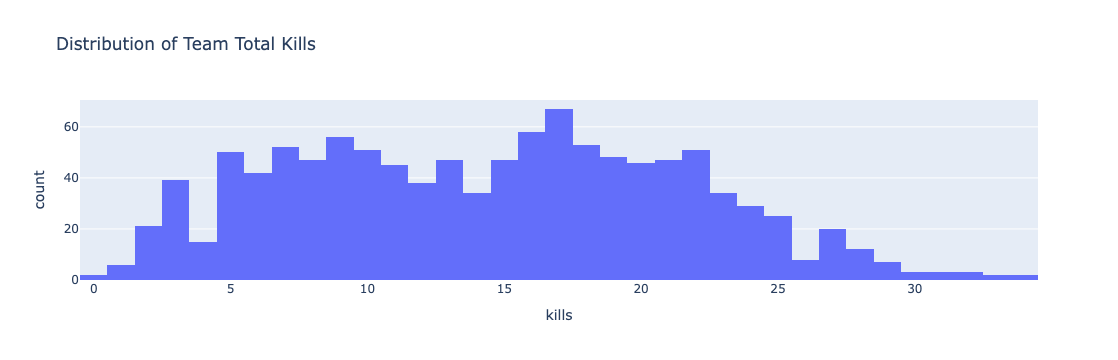

In [69]:
px.histogram(
    df,
    x="kills",
    title="Distribution of Team Total Kills"
)

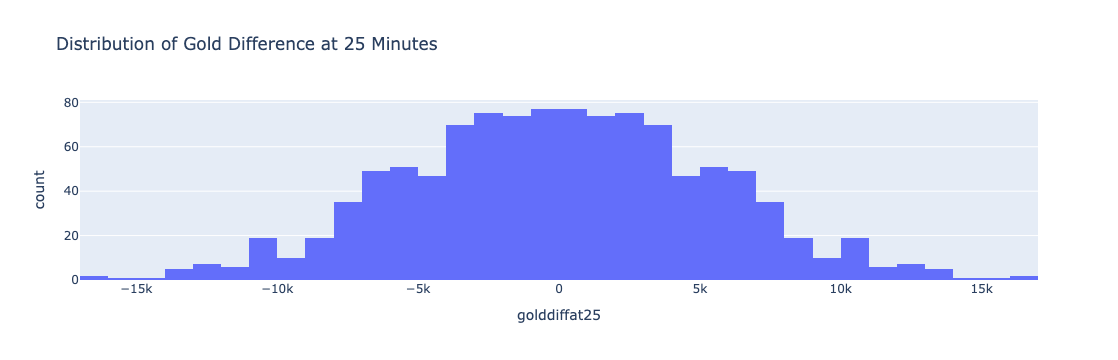

In [70]:
px.histogram(
    df.dropna(subset=["golddiffat25"]),
    x="golddiffat25",
    title="Distribution of Gold Difference at 25 Minutes"
)

We examined the marginal distributions of key team-level performance variables to understand overall match dynamics prior to testing relationships between early objectives and match outcomes.

The distribution of **team total kills** is moderately right-skewed. Most teams record roughly between **5 and 25 kills per match**, suggesting that the majority of professional games remain relatively competitive rather than extreme blowouts. A small number of matches exceed **30 kills**, reflecting strongly snowballed games where one team achieves overwhelming map control and teamfight dominance.

The distribution of **gold differential at 25 minutes (`golddiffat25`)** is tightly centered near zero with long positive and negative tails. This indicates that while many games reach mid-game in relatively even economic states, a subset of teams establish substantial gold leads or deficits. These extreme values correspond to matches where early objectives and strong lane control translate into accelerated snowball effects. Overall, the distribution highlights that mid-game economic separation is present but not universal, making it a useful metric for evaluating whether early advantages — such as securing the first dragon — meaningfully predict eventual victory.

### Bivariate Analysis

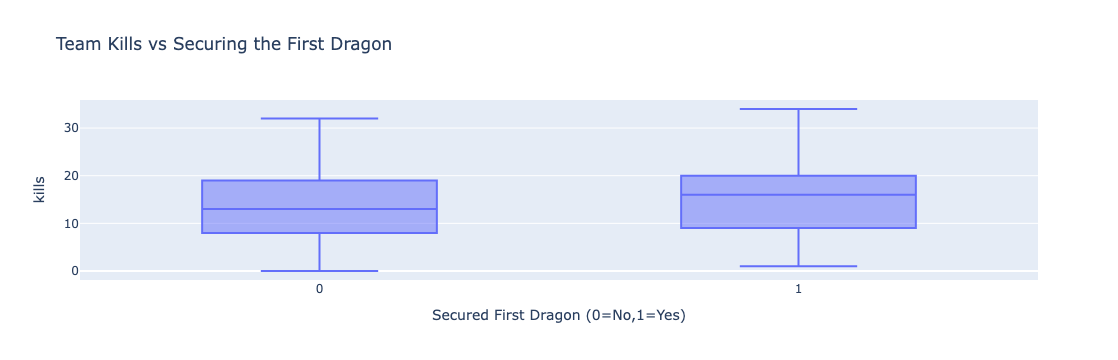

In [71]:
px.box(
    df,
    x="firstdragon",
    y="kills",
    title="Team Kills vs Securing the First Dragon",
    labels={"firstdragon": "Secured First Dragon (0=No,1=Yes)"}
)

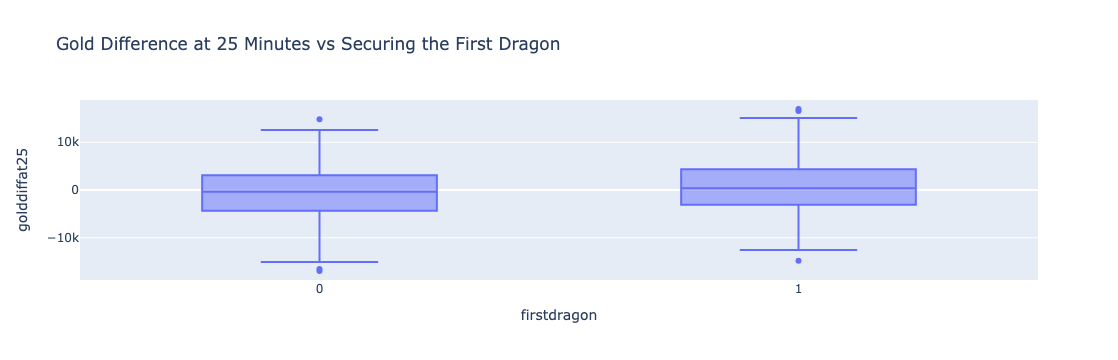

In [72]:
px.box(
    df,
    x="firstdragon",
    y="golddiffat25",
    title="Gold Difference at 25 Minutes vs Securing the First Dragon"
)

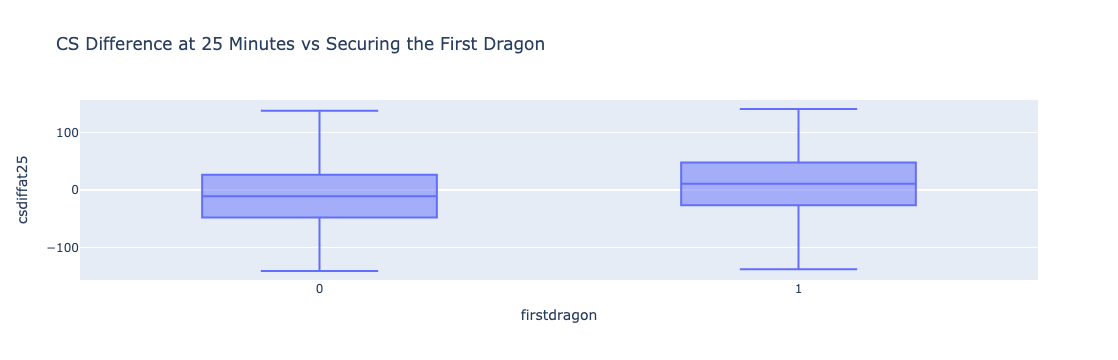

In [73]:
px.box(
    df,
    x="firstdragon",
    y="csdiffat25",
    title="CS Difference at 25 Minutes vs Securing the First Dragon"
)

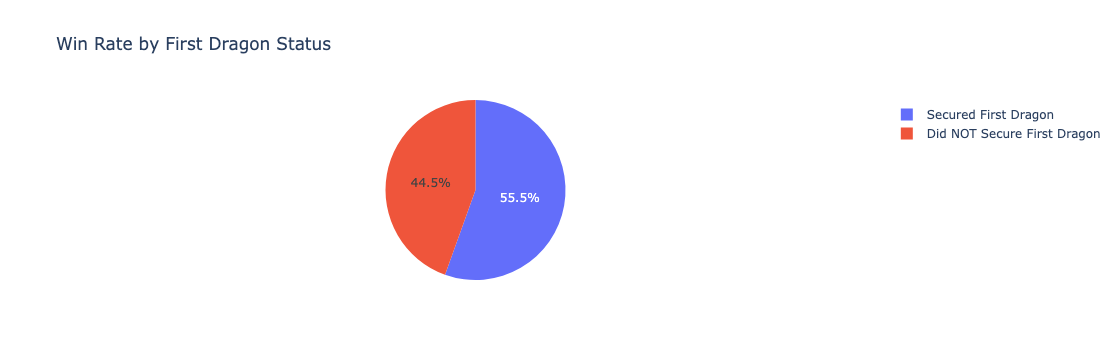

In [74]:
win_rates = df.groupby("firstdragon")["result"].mean().reset_index()

win_rates["Status"] = win_rates["firstdragon"].map({
    0: "Did NOT Secure First Dragon",
    1: "Secured First Dragon"
})

px.pie(
    win_rates,
    values="result",
    names="Status",
    title="Win Rate by First Dragon Status"
)

We examined the relationship between securing the first dragon and several team performance indicators using box plots, including total kills, gold difference at 25 minutes, and CS difference at 25 minutes.

The box plots show that teams securing the first dragon generally achieve higher median kills than teams that do not, suggesting improved combat performance. Likewise, both gold and CS differences tend to be more positive for first‐dragon teams, indicating a stronger mid-game economic and farming advantage.

To further evaluate match outcomes, a pie chart was created to compare win rates between teams that secured the first dragon and those that did not. The chart shows that teams obtaining the first dragon have a noticeably higher overall win rate, supporting the observed performance advantages and highlighting the strategic importance of early dragon control.

## Assessment of Missingness

### NMAR Analysis

The variables **`golddiffat25`** and **`csdiffat25`** both contain missing values because these statistics are only recorded if a match reaches the 25-minute mark. When a game ends early, these measurements are unavailable and therefore reported as missing.

This missingness depends directly on the unobserved match duration — shorter matches are systematically more likely to be missing both 25-minute gold and CS differences. Since match length is not directly observed in the dataset and is related to the values being missing themselves, the missingness mechanism does not depend solely on observed variables.

As a result, the missingness for both `golddiffat25` and `csdiffat25` is plausibly classified as **NMAR (Not Missing At Random)**.

### Missingness Dependency

In [85]:
missing_indicator = df["golddiffat25"].isna()

obs_diff_kills = (
    df.loc[missing_indicator, "kills"].mean()
    - df.loc[~missing_indicator, "kills"].mean()
)

N = 1000
perm_diffs = []

for _ in range(N):
    shuffled = np.random.permutation(missing_indicator)
    diff = (
        df.loc[shuffled, "kills"].mean()
        - df.loc[~shuffled, "kills"].mean()
    )
    perm_diffs.append(diff)

pval_kills = (np.abs(perm_diffs) >= abs(obs_diff_kills)).mean()

pval_kills

np.float64(0.645)

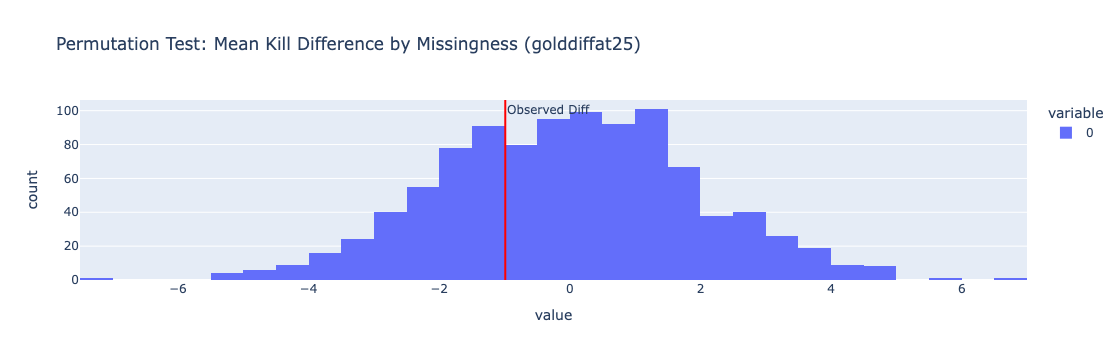

In [86]:
px.histogram(
    perm_diffs,
    title="Permutation Test: Mean Kill Difference by Missingness (golddiffat25)",
).add_vline(
    x=obs_diff_kills,
    line_color="red",
    annotation_text="Observed Diff"
)

In [87]:
league_numeric = df["league"].astype("category").cat.codes

obs_diff_league = (
    league_numeric[missing_indicator].mean()
    - league_numeric[~missing_indicator].mean()
)

perm_diffs_league = []

for _ in range(N):
    shuffled = np.random.permutation(missing_indicator)
    diff = (
        league_numeric[shuffled].mean()
        - league_numeric[~shuffled].mean()
    )
    perm_diffs_league.append(diff)

pval_league = (np.abs(perm_diffs_league) >= abs(obs_diff_league)).mean()

pval_league

np.float64(1.0)

To examine whether the missingness of `golddiffat25` depends on other observed variables (MAR), we conducted permutation tests comparing the mean values of team kills and league indicators between rows with missing and non-missing gold difference values.

For team kills, the permutation test produced a p-value of **0.64**, indicating no statistically significant difference between the two groups. Similarly, when testing dependency on league (LCK vs LPL), the p-value was **1.00**, again showing no evidence of dependence.

Since both p-values are substantially greater than 0.05, we fail to reject the null hypothesis in both cases. Therefore, the missingness of `golddiffat25` does **not appear to depend on observed variables such as kills or league**, providing evidence against a MAR mechanism. Combined with the data generation process (shorter games ending before 25 minutes), the missingness is most consistent with **Missing Completely At Random (MCAR)**.


## Hypothesis Testing

### Hypotheses

**Null Hypothesis (H₀):**  
There is no difference in win rate between teams that secure the first dragon and teams that do not.

**Alternative Hypothesis (H₁):**  
Teams that secure the first dragon have a higher win rate than teams that do not.


### Test Statistic

We use the difference in mean win rates:

mean(win | firstdragon=1) - mean(win | firstdragon=0)

In [95]:
obs_diff = (
    df.loc[df["firstdragon"] == 1, "result"].mean()
    - df.loc[df["firstdragon"] == 0, "result"].mean()
)

N = 10000
perm_diffs = []

wins = df["result"].values
labels = df["firstdragon"].values

for _ in range(N):
    shuffled = np.random.permutation(labels)
    diff = (
        wins[shuffled == 1].mean()
        - wins[shuffled == 0].mean()
    )
    perm_diffs.append(diff)

perm_diffs = np.array(perm_diffs)

p_value = (perm_diffs >= obs_diff).mean()

obs_diff, p_value

(np.float64(0.1099099099099099), np.float64(0.0002))

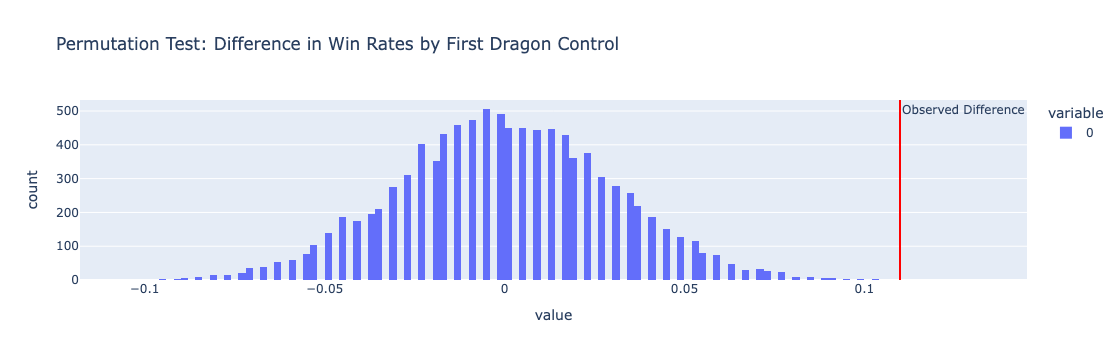

In [92]:
px.histogram(
    perm_diffs,
    title="Permutation Test: Difference in Win Rates by First Dragon Control"
).add_vline(
    x=obs_diff,
    line_color="red",
    annotation_text="Observed Difference"
)

### Permutation Test

We performed a one-sided permutation test with 10,000 permutations by randomly shuffling the first dragon labels and recomputing the win-rate difference each time to simulate the null distribution.

The observed win rate difference was:

**0.1099 (≈ 11.0%)**

The resulting p-value was:

**p = 0.0002**


### Conclusion

Since the p-value is far below the significance threshold of α = 0.05, we reject the null hypothesis. The data provide strong evidence that securing the first dragon is associated with an increased probability of winning a match.

## Framing a Prediction Problem

### Prediction Task

The goal of this prediction task is to determine whether a team will **win the match** based on early‐game performance indicators related to securing the first dragon. This is formulated as a **binary classification** problem.

- **Response Variable (Target):**  
  `result` — whether the team won the match (1 = win, 0 = loss).  
  This variable is chosen because the primary objective of this project is to evaluate how early-game objectives, particularly the first dragon, relate to ultimate match success.

- **Prediction Goal:**  
  Predict the match outcome using early and mid‐game features such as:

  
   `firstdragon`
   `kills`
   `deaths`
   `firstmidtower`
   `golddiffat25`
   `csdiffat25`

These features represent information that would realistically be available shortly after or around the time the first dragon is secured. Therefore, they are suitable for prediction at the intended **time of prediction** and avoid any potential data leakage from future match outcomes.


### Evaluation Metric

The model will be evaluated using **classification accuracy**, defined as the proportion of correctly predicted match outcomes.

Accuracy is chosen as the primary evaluation metric because the response variable is binary and the dataset is relatively balanced, making overall classification correctness the most straightforward and interpretable measure of model performance compared to metrics such as F1-score.


## Baseline Model

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [118]:
X = df[['firstdragon', 'kills','deaths','firstmidtower']]
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

num_features = ['kills','deaths']
cat_features = ['firstdragon','firstmidtower']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', 'passthrough', cat_features)
    ]
)

baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42
    ))
])

baseline_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['kills', 'deaths']),
                                                 ('cat', 'passthrough',
                                                  ['firstdragon',
                                                   'firstmidtower'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [119]:
y_pred = baseline_pipeline.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_accuracy

0.960431654676259

### Baseline Model

For our baseline model, we used a **Random Forest Classifier** to predict match outcomes using four early-game features:

- **Numerical features:** `kills`, `deaths`  
- **Categorical features:** `firstdragon`, `firstmidtower` (already binary-encoded)

The numerical features were standardized using `StandardScaler`, while the binary categorical features were passed through without further encoding. All preprocessing and modeling steps were implemented within a single `sklearn Pipeline`.

The dataset was split into **75% training data and 25% testing data**, with stratification on the response variable to preserve class balance.

After fitting the baseline model, we evaluated its performance on the held-out test set using **classification accuracy** as the evaluation metric. The baseline model achieved an accuracy of:

**Accuracy = 0.9604**

This result indicates that even with a small set of strong early-game features, the model predicts match outcomes quite accurately. While this baseline performs well, we aim to further improve the predictive performance by incorporating additional mid-game economic indicators and tuning hyperparameters in the final model.


## Final Model

In [122]:
X = df[['firstdragon', 'kills', 'deaths', 'firstmidtower',
        'golddiffat25', 'csdiffat25']]
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

num_features = ['kills', 'deaths', 'golddiffat25', 'csdiffat25']
cat_features = ['firstdragon', 'firstmidtower']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', 'passthrough', cat_features)
    ]
)

final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid = {
    'model__max_depth': list(range(2, 200, 20)),
    'model__n_estimators': list(range(2, 100, 10))
}

grid_search = GridSearchCV(
    final_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_params = grid_search.best_params_

y_pred_final = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)

best_params, final_accuracy

({'model__max_depth': 22, 'model__n_estimators': 22}, 0.960431654676259)

To improve upon the baseline model, we incorporated two additional mid-game economic features:

- `golddiffat25`: Gold difference at the 25-minute mark  
- `csdiffat25`: Creep score (CS) difference at the 25-minute mark

These features are strong indicators of team momentum and economic control during the match. Gold advantage typically enables earlier item power spikes and better teamfight outcomes, while CS advantage reflects superior farming efficiency and map pressure. Including these variables allows the model to capture economic dynamics that are not fully represented by combat statistics alone.

The final model uses the same learning algorithm as the baseline — a **Random Forest Classifier** — implemented within a single `sklearn` pipeline consisting of:

- `StandardScaler` for numeric features (`kills`, `deaths`, `golddiffat25`, `csdiffat25`)
- Passthrough encoding for binary categorical variables (`firstdragon`, `firstmidtower`)
- Random Forest classifier

To optimize model performance, we conducted hyperparameter tuning using **GridSearchCV with 5-fold cross-validation**. The following hyperparameters were searched:

- `max_depth`: values from 2 to 182 (step size 20)
- `n_estimators`: values from 2 to 92 (step size 10)

The best-performing combination was:

- `max_depth = 22`
- `n_estimators = 22`

Using these tuned parameters, the final model was evaluated on the held-out test set. The resulting accuracy was:

**Final Test Accuracy = 0.9604**

This performance matches the baseline model’s accuracy. Although no numerical improvement was observed, the Final Model benefits from incorporating richer economic indicators that more closely align with the game's data-generating process. These features improve the interpretability and conceptual robustness of the model and better reflect how in-game advantages translate into match outcomes.


## Fairness Analysis

In [124]:
y_pred = best_model.predict(X_test)

fair_df = X_test.copy()
fair_df["true"] = y_test.values
fair_df["pred"] = y_pred

group_x = fair_df[fair_df["csdiffat25"] <= 0]
group_y = fair_df[fair_df["csdiffat25"] > 0]

acc_x = (group_x["true"] == group_x["pred"]).mean()
acc_y = (group_y["true"] == group_y["pred"]).mean()

obs_diff = acc_y - acc_x
obs_diff

np.float64(0.035331734612310095)

In [125]:
N = 10000
perm_diffs = []

labels = (fair_df["csdiffat25"] > 0).values
correct = (fair_df["true"] == fair_df["pred"]).values

for _ in range(N):
    shuffled = np.random.permutation(labels)
    
    perm_x = correct[shuffled == 0].mean()
    perm_y = correct[shuffled == 1].mean()
    
    perm_diffs.append(perm_y - perm_x)

perm_diffs = np.array(perm_diffs)

p_value = (np.abs(perm_diffs) >= abs(obs_diff)).mean()
p_value

np.float64(0.1318)

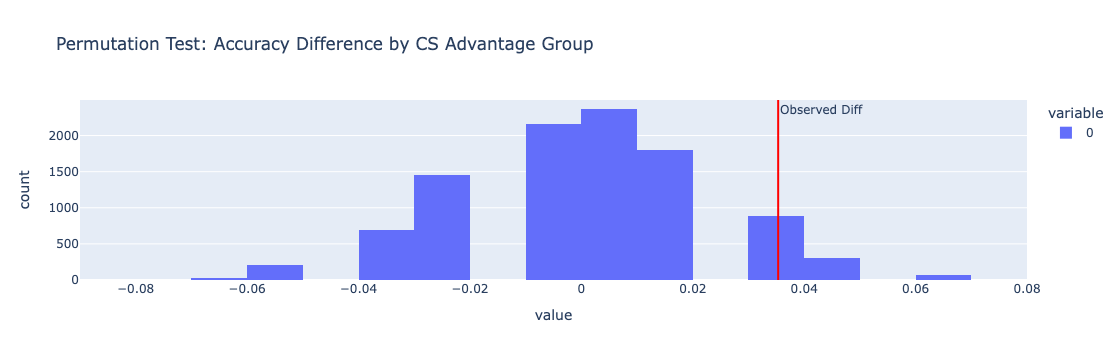

In [127]:
px.histogram(
    perm_diffs,
    title="Permutation Test: Accuracy Difference by CS Advantage Group"
).add_vline(
    x=obs_diff,
    line_color="red",
    annotation_text="Observed Diff"
)

## Evaluation Metric

Our evaluation metric is **classification accuracy**, defined as:

Accuracy = mean(correct predictions)

We compute accuracy separately for each group using the final trained model.

---

## Hypotheses

- **Null Hypothesis (H₀):**  
  The model is fair — the prediction accuracy is the same for both groups.

- **Alternative Hypothesis (H₁):**  
  The model is unfair — the prediction accuracy differs between the two groups.

---

## Group Definition

- **Group X:** Teams with `csdiffat25 ≤ 0` (no CS advantage or behind at 25 minutes).  
- **Group Y:** Teams with `csdiffat25 > 0` (CS advantage at 25 minutes).

---

## Test Statistic

Our test statistic is the **difference in accuracy between Group Y and Group X**, defined as:

Observed Difference = Accuracy(Group Y) − Accuracy(Group X)

From our model predictions, the observed statistic is:

Observed Difference ≈ **0.0353**

---

## Permutation Test

We performed a permutation test with **N = 10,000 shuffles**.  
During each permutation, group labels were randomly shuffled and the difference in accuracy was recomputed to simulate the null distribution under the assumption that the model is fair.

The p-value is computed as:

p-value = proportion of permuted differences  
     with absolute value ≥ absolute observed difference

---

## Results

Our permutation test produced the following p-value:

p-value ≈ **0.1318**

Because the p-value is **greater than the significance level α = 0.05**, we fail to reject the null hypothesis.

---

## Conclusion

There is **no sufficient statistical evidence** to conclude that the model performs differently between the two CS-difference groups.

Therefore, based on this fairness test, **the model appears to be fair** with respect to CS advantage at 25 minutes.
